# Python ja tekoäly: koodauksen perusteet

# Ryhmittely k-means -algoritmilla

## Koulutus: 28.11.2019

In [1]:
# Let's use the usual Python libraries:
import pandas as pd              # for managing data frame
import numpy as np               # for performing data array calculations
import matplotlib.pyplot as plt  # for plotting

# For visualization, we use Matplotlib and Seaborn
from matplotlib.mlab import PCA  # for Principal Component analysis
import seaborn as sns            # for visualization

# CLustering algorithms from these libraries:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets.samples_generator import make_blobs

# Ryhmittely eli klusterointi


Ryhmittelyalgoritmeilla pyritään löytämään merkityksellisiä ryhmiä datasta. Algoritmeilla on joku matemaattisesti määritely funktio, jota optimoidaan tai vain algoritminen kuvaus, jolla ryhmiä löydetään. Se, onko löydetyt ryhmät merkityksellisiä, jää ihmisen päätettäväksi. Klusteroinnin ominaisuuksia voidaan kuitenkin mitata siinä mielessä ovatko ryhmien kuvaukset kompakteja ja ryhmät toisistaan eroavia. Mikään algorimi ei kuitenkaan voi itse päättää onko löydetty ryhmittely hyvä tai merkityksellinen.



Seuraavassa luomme keinotekoisen datajoukon, jonka tarkoituksena on toimia kontrolloituna esimerkkinä siitä, että datassa on toisistaan eroavia ryhmiä, joita voidaan algorimtmisesti etsiä. Käytämme tässä sklearn -kirjaston funktiota, jolla voi helposti luoda esimerkkiaineistoja.

In [2]:
# Seuraavaksi luodaan dataa, joka koostuu kolmesta ryhmästä (centers=3), kukin vektoreista sisältää
# kaksi mittausta (n_features=2):

# ALKUPERÄINEN: X_data, X_cluster_index = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
X_data, X_cluster_index = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=0)

# Voidaan tarkastella dataa ja klusteri-indeksejä eli sitä mihin ryhmään kukin datavektori kuuluu.
# Voit ajaa koodia ottamalla kommenttimerkin pois ja evaluoimalla solun:

# Datan dimensiot eli rivien määrän ja sarakkeiden määrän näkee seuraavalla komennolla:
# print(X_data.shape)

# Muuttuja X_data sisältää itse ryhmiteltävän datan
# Muuttuja X_cluster_index on indeksimuuttuja (0,1,2,...), joka kertoo mihin klusteriin mittausvektori kuuluu
# X_data
# X_cluster_index

# Voimme katsoa paljonko dataa on kussakin klusterissa luomalla histogrammin indekseistä:
# plt.hist(X_cluster_index)


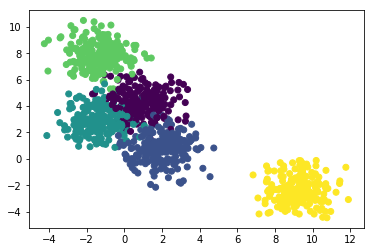

In [3]:
# Dataa kannattaa aina "katsoa" tai tutkia ennenkuin dataa analysoidaan algoritmien avulla. Piirretään 
plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c=X_cluster_index)

Tarkastele ylläolevaa kuvaa. Näetkö datassa selkeitä ryhmiä? Miltä data vaikuttaa?

## K-means -algoritmi

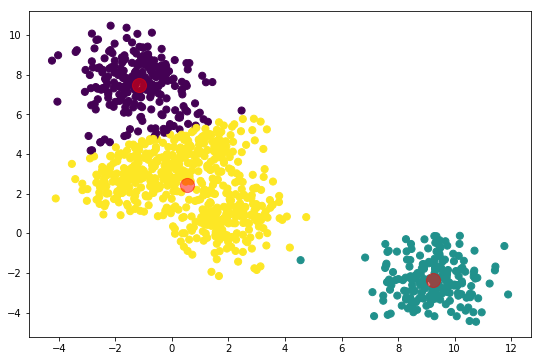

In [4]:
# Nyt ajetaan k-means -algoritmi keinotekoiselle datalle, jossa on siis kolme klusteria:

# Parametreinä k-means -algoritmille annetaan ryhmien lukumäärä:

# ALKUPERÄINEN: number_of_clusters = 3; # Tässä määrätään etsittävien klustereiden määrä
number_of_clusters = 3; # Tässä määrätään etsittävien klustereiden määrä

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0, max_iter=100)
kmeans.fit(X_data)

# lasketaan joka datavektorille parhaiten sitä vastaava klusteri ja väritetään sen klusterin piste omalla
y_colors = kmeans.predict(X_data)
centers = kmeans.cluster_centers_

# Piirretään data ja klusterikeskukset samaan kuvaan:
figure, axes = plt.subplots(figsize=[9,6])
plt.scatter(X_data[:,0], X_data[:,1], s=50, c=y_colors)
plt.scatter(centers[:,0], centers[:,1], c='r', s=200, alpha=0.5)

## Tehtävä k1: muuta klusterien määrää datassa

Toista ylläoleva analyysi muuttamalla algoritmin parametreja. Luo esimerkiksi 10 ryhmää vaihtamalla make_blobs funktion parametriä (centers=3). Aja algoritmi ja tulkitse tulosta. Mitä tapahtuu kun datassa on kolme klusteria ja algoritmi etsii datasta kymmentä klusteria? 

## Tehtävä k2: muuta klusterien määrää algoritmissa

Vaihda klusterien määrä (katso riviltä ALKUPERÄINEN:) takaisin kolmeen (centers=3), evaluoi solut ja
muuta nyt algoritmin parametrejä niin, että pyritäänkin hakemaan 10 klusteria. Muuta Kmeans-funktion
yläpuolella olevaa määritystä (number_of_clusters = 10) niin että haetaan kymmentä klusteria. Aja nyt
koodi uudestaan ja tulkitse tulosta.

## Tehtävä k3: muuta datavektoreiden määrää datassa

Muuta datavektoreiden määrää keinotekoisessa datassa vaikka viiteentuhanteen (n_samples=5000) funktiossa make_blobs. Aja koodi uudestaan. Tarkastele tulosta ja tulkitse.

## Tehtävä k4: laske ryhmittelytulokselle hyvyysluku (Davis-Bouldin -indeksi)

Annetulle ryhmittelylle voidaan datan perusteella laskea hyvyysindeksi, joka kuvaa kuinka hyvin data jakautuu erityyppisiin ryhmiin. Tyyppillisesti elementteinä tämäntyyppisissä indekseissä on klusteriin kuuluva varianssi, joka kuvaa kuinka hyvin klusterikeskus kuvaa dataa ja toisena ryhmien välinen etäisyys, joka kuvaa kuinka paljon ryhmät eroavat toisistaan. 

Tutki [Davies-Bouldin -indeksiä]
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) ja katso sen määritelmää [dokumentaatiosta] (https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index).
    
Kirjoita koodia, joka ottaa käyttöön tarvittavan funktion davies_bouldin_score kirjastosta sklearn.metrics. Funktio otetaan käyttöön import -käskyllä.

Laske hyvyysindeksi tekemällesi klusteroinnille. Muuta ratkaisua tehtävien 1-3 hengessä ja laske hyvyysindeksi uudelle ratkaisulle. Miten indeksi muuttuu?

In [5]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X_data, kmeans.labels_)

# Ei kannata välittää alla olevasta virheestä.. (kirjaston sisäinen ongelma)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.5773854334844613

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_d

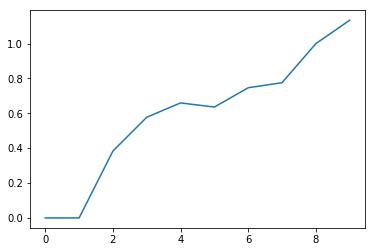

In [6]:
db_index = np.zeros(10)
for c in range(2,10):
    kmeans = KMeans(n_clusters=c, max_iter=100)
    kmeans.fit(X_data)
    db_index[c] = davies_bouldin_score(X_data, kmeans.labels_)

plt.plot(db_index)
    

## Tehtävä k5: klusteroi käsinkirjoitettuja numeroita

Lataa käsinkirjoitattuja numeroita, jotka on digitoitu 8x8 pikselin kuviksi,
käytä alla olevia kirjastoja ja komentoja. Kuten tiedämme, numeroita on kymmenen
erilaista (0-9). Klusteroi data ja kokeile eri vaihtoehtoja klustereiden määräksi.
Piirrä klusterien keskipisteet kuviksi samalla tavalla kuin alla piirretään yksi
numero.

Katso datan tietorakennetta tarkemmin dokumentaatiosta: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html Tarkastele datan tietorakenteita ja tutki miten saat kuvadatan esitettyä datavektoreina.

(1797, 64)


<Figure size 432x288 with 0 Axes>

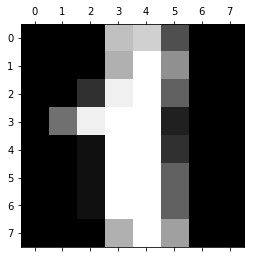

In [7]:
# Lataa käsinkirjoitettuja numeroita:
from sklearn.datasets import load_digits
# import matplotlib.pyplot as plt

# Lataa käsinkirjoitetut numerot datajoukoksi:
digits = load_digits()

# Katso paljonko numeroita on datajoukossa:
print(digits.data.shape)
(1797, 64)

# Piirrä yksi numero harmaasävykuvana:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [8]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
# Tässä annetaan montako klusteria halutaan datasta (numeroita on tunnetusti 10 kpl, 0..9)
number_of_clusters = 10
digit_clusters = KMeans(n_clusters=number_of_clusters, random_state=0, max_iter=100)
digit_clusters.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

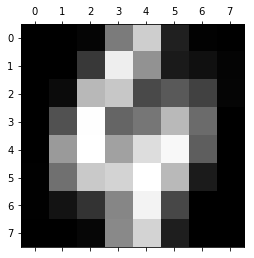

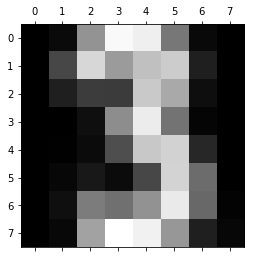

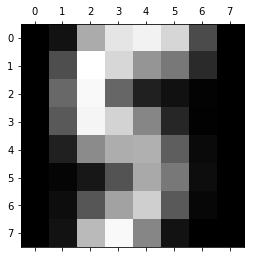

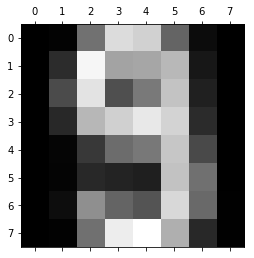

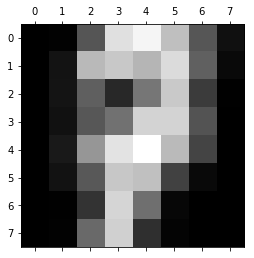

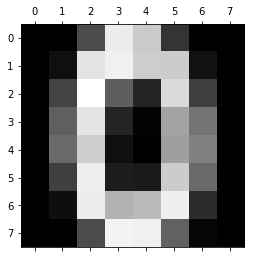

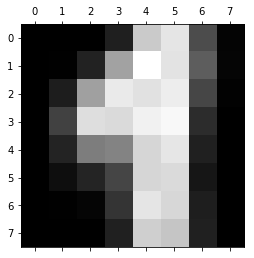

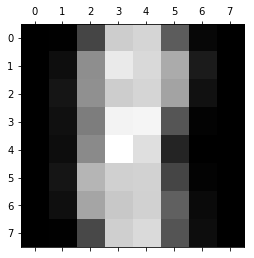

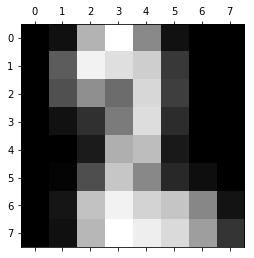

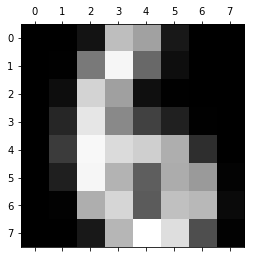

In [10]:
klusterit = digit_clusters.cluster_centers_

for i in range(0, number_of_clusters):
    plt.matshow(klusterit[i].reshape(8,8))


## Tehtävä k6, käsinkirjoitetut merkit

Katso millaisia klustereita saat datasta, kun muutat klustereiden määrää pienemmäksi kuin 10. Numeroita on tietysti 10, klustereita on nyt vähemmän, joten ne pyrkivät esittämään kaikki 10 numeroa.

## Tehtävä k7: THL terveysdatan klusterointi